## Binary Robust Invariant Scalable Keypoint (BRISK)
***

O detector de ponto-chave BRISK, introduzido por Leutenegger, et al. em seu artigo ICCV 2011, o BRISK: Binary Robust Invariant Scalable Keypoint, é uma extensão para o detector de ponto-chave FAST e visa abordar uma limitação crítica de FAST: invariancia de espaço de escala.

A implementação original do FAST por Rosten e Drummond (2005) apenas examina a imagem em uma única escala, o que significa que é improvável que pontos-chave pudessem ser repetidos em várias escalas da imagem. O BRISK é capaz de resolver esta limitação criando imagens de espaço em escala. O processo geral é reduzir para metade o tamanho da imagem para cada camada da pirâmide.

FAST examina os valores de intensidade de pixels em torno do pixel central p. Se n pixels contíguos forem maiores ou menores do que o pixel central, a região será marcada como um ponto-chave. Sob o capô, o BRISK utiliza o detector de ponto-chave FAST usando uma vizinhança circular de 16 pixels e usa o teste de alta velocidade com n = 9 pixels na tentativa de atender o requisito contíguo. Se pelo menos 9 pixels consecutivos neste círculo de 16 pixels satisfizerem o requisito de limiar, o pixel central é marcado como um ponto-chave. Este processo é então repetido para cada camada da pirâmide.

Assim como você pode ver, o detector de ponto-chave BRISK é uma extensão bastante simples para o detector de ponto-chave FAST. No entanto, o principal benefício de usar o BRISK é que a invariância do espaço de escala é adicionada apenas em um custo ligeiramente modesto.O BRISK ainda é muito adequado para aplicativos em tempo real, portanto, sempre que você estiver considerando usar FAST, também dê uma chance ao BRISK e veja se o desempenho melhora.

***

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2


def show(img, title=""):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.title(title, fontdict={"fontsize": 100})
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
# Carrega a imagem e converte para Grayscale
image = cv2.imread("imagens/plataforma.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
# Cria o detector BRISK
detector = cv2.BRISK_create()
kps = detector.detect(gray)
print("Número de keypoints: {}".format(len(kps)))

Número de keypoints: 1565


In [4]:
# Loop pelos keypoints e desenha na imagem
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

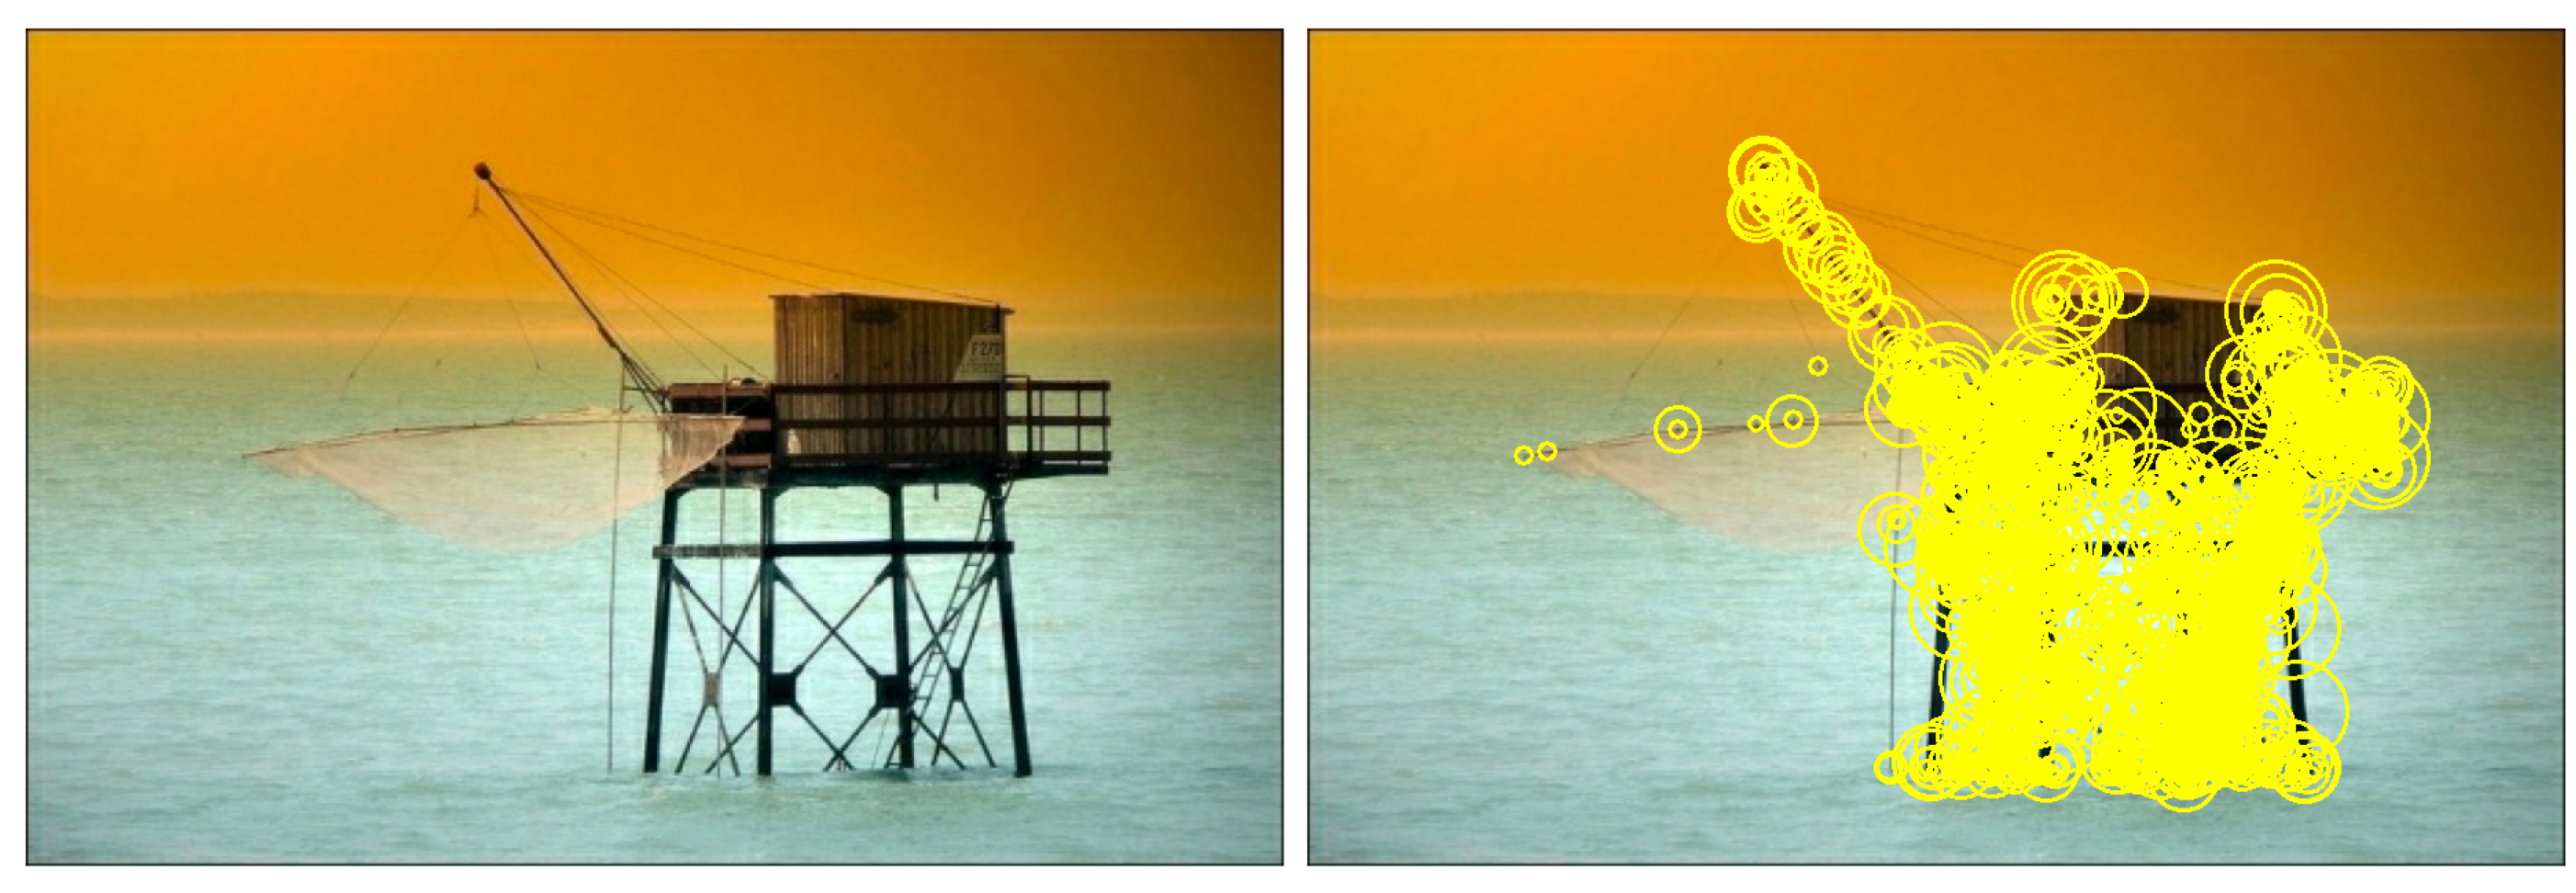

In [5]:
# Print
show(np.hstack([orig, image]))